In [78]:
#import
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots  import plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import levy_stable
%matplotlib notebook

In [79]:
# get bet index from csv
bet=pd.read_csv('^bet_d.csv')
# keep 2000-2010
bet=bet[bet['Date']>='2000-01-01']
bet=bet[bet['Date']<='2010-12-31']
# set Date as index
bet = bet.set_index('Date')
bet =pd.DataFrame(bet['Close'])
# calculate the logaritmic return
log_return_bet=np.log(bet/bet.shift(1))
log_return_bet=log_return_bet[1:]
# save return lower the -10%
log_top_neg_val=log_return_bet[log_return_bet['Close']<-0.1]
log_top_neg_val['Date']=log_top_neg_val.index
print(log_top_neg_val)

               Close        Date
Date                            
2005-03-28 -0.119018  2005-03-28
2008-10-08 -0.118240  2008-10-08
2008-10-10 -0.101684  2008-10-10
2009-01-07 -0.112916  2009-01-07
2010-05-25 -0.110125  2010-05-25


C:\Users\Dragos\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
# make n array, from [0,t-1] werhe t is the position of a lower value
log_return_bet_min=list()
for i in  log_top_neg_val.values:
    log_return_bet_min.append(log_return_bet[log_return_bet.index<i[1]])

<IPython.core.display.Javascript object>


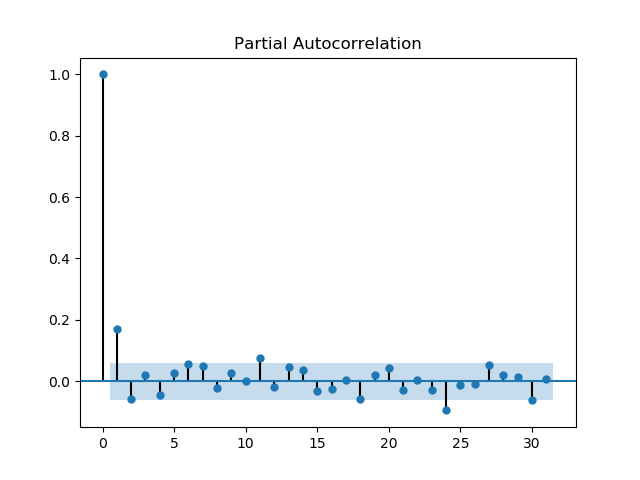

<IPython.core.display.Javascript object>


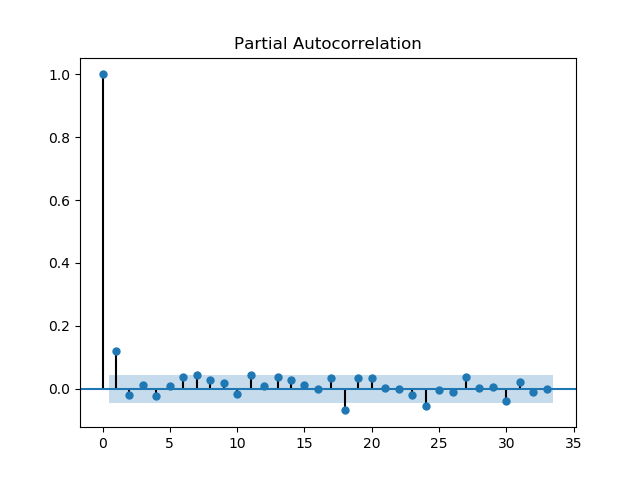

<IPython.core.display.Javascript object>


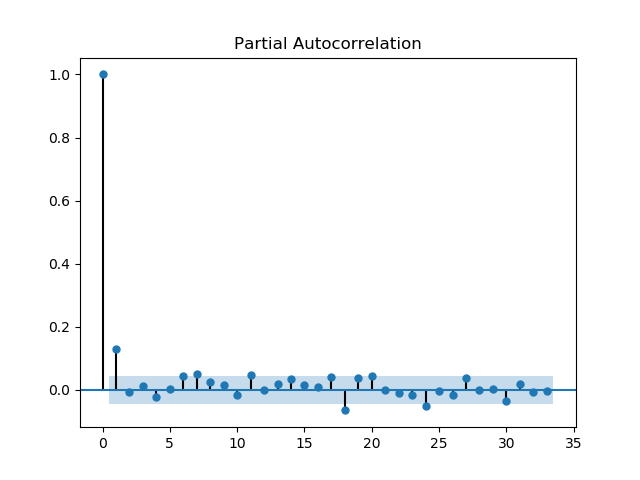

<IPython.core.display.Javascript object>


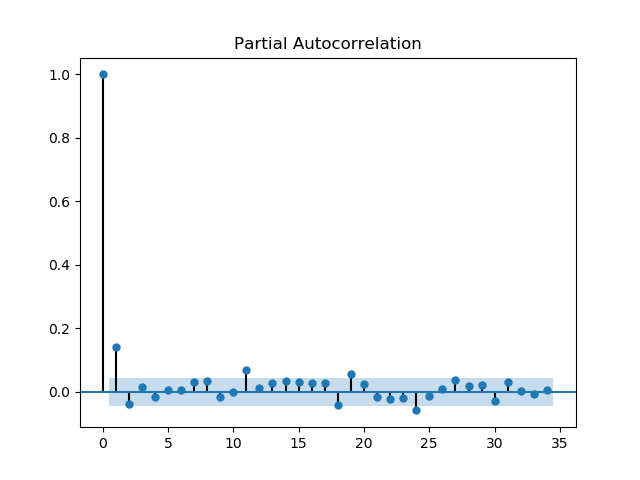

<IPython.core.display.Javascript object>


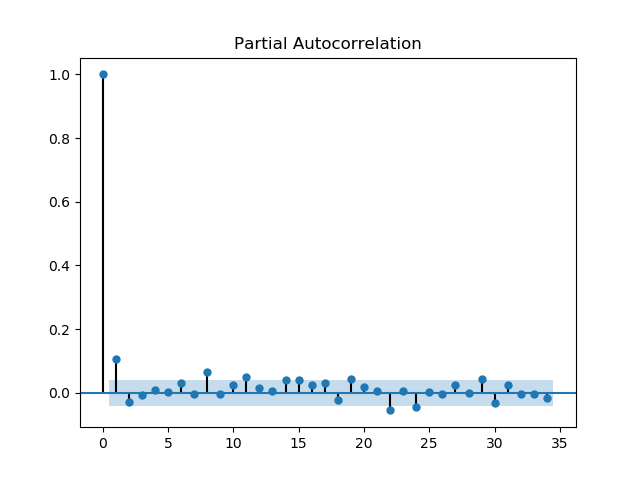

In [81]:
# plot the pacf to knowing the p value
for i in  range(0,len(log_return_bet_min)):
    plot_pacf(log_return_bet_min[i])
    plt.show()

In [5]:
for i in  range(0,len(log_return_bet_min)):
    print(acorr_ljungbox(log_return_bet_min[i],4))


(array([31.40482672, 32.11438315, 32.14121114, 33.56485227]), array([2.09459550e-08, 1.06279696e-07, 4.88683050e-07, 9.15115580e-07]))
(array([28.58625578, 28.61596164, 28.71499502, 29.47584036]), array([8.96160259e-08, 6.11114914e-07, 2.57048951e-06, 6.25676623e-06]))
(array([32.49345114, 32.63622359, 32.86765076, 33.64731836]), array([1.19594860e-08, 8.18717536e-08, 3.43448745e-07, 8.80186134e-07]))
(array([39.71969085, 40.3077399 , 40.39238468, 40.63191841]), array([2.93154908e-10, 1.76719914e-09, 8.79778400e-09, 3.20328739e-08]))
(array([26.88313205, 27.65601786, 28.07161377, 28.13994427]), array([2.16137059e-07, 9.87579409e-07, 3.50847410e-06, 1.16842594e-05]))


In [82]:
# made an ar(1)-garch(1,1) model
res=list()
for i in  range(0,len(log_return_bet_min)):
    am = arch_model(log_return_bet_min[i]['Close'], mean='AR', lags=1, vol='GARCH', p=1,q=1)
    fit = am.fit()
    res.append(fit)
    print('-------------------------------------------------------------------------------------')

C:\Users\Dragos\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002149. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
C:\Users\Dragos\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\Dragos\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002552. Param

Iteration:      1,   Func. Count:      7,   Neg. LLF: -3128.3335561472736
Iteration:      2,   Func. Count:     21,   Neg. LLF: -3128.3753039243775
Iteration:      3,   Func. Count:     33,   Neg. LLF: -3128.3757381686682
Iteration:      4,   Func. Count:     46,   Neg. LLF: -3128.3778372703864
Iteration:      5,   Func. Count:     57,   Neg. LLF: -3128.382120009595
Iteration:      6,   Func. Count:     70,   Neg. LLF: -3128.3962945484323
Iteration:      7,   Func. Count:     82,   Neg. LLF: -3128.398967814602
Iteration:      8,   Func. Count:     96,   Neg. LLF: -3128.4433047463635
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -3128.4433038112
            Iterations: 12
            Function evaluations: 96
            Gradient evaluations: 8
-------------------------------------------------------------------------------------
Iteration:      1,   Func. Count:      7,   Neg. LLF: -5504.70516602207
Iteration:      2,   Func. Count:  

C:\Users\Dragos\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


In [83]:
# save the parameters
df_ar_garch=pd.DataFrame(columns=['Date', 'u', 'o','w','L','B'])
for i in  range(0,len(params)):
    df_ar_garch.loc[i]=[log_top_neg_val['Date'][i],res[i].params[0],res[i].params[1],res[i].params[2],res[i].params[3],res[i].params[4]]
df_ar_garch  

,Date,u,o,w,L,B
0,2005-03-28,0.001648,0.164850,0.000022,0.200007,0.699993
1,2008-10-08,0.001174,0.121183,0.000026,0.200001,0.699999
2,2008-10-10,0.001187,0.130527,0.000026,0.200082,0.699928
3,2009-01-07,0.001168,0.140799,0.000030,0.200000,0.700000
4,2010-05-25,0.000879,0.106920,0.000007,0.200000,0.780000


In [54]:
l=list()
for i in  range(0,len(params)):
    l.append(levy_stable.fit(res[i].resid[1:]))

C:\Users\Dragos\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3898: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
C:\Users\Dragos\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1682: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


In [86]:
# save the result, (date, return, probability for that return to be lower,time cicle of that event)
result=pd.DataFrame(columns=['Date', 'r', 'P','T'])
for i in  range(0,len(params)):
    result.loc[i]=[log_top_neg_val['Date'][i],log_top_neg_val['Close'][i],levy_stable.cdf(log_top_neg_val['Close'][i],l[i][0],l[i][1],l[i][2],l[i][3]),1/(250*levy_stable.cdf(log_top_neg_val['Close'][i],l[i][0],l[i][1],l[i][2],l[i][3]))]

In [85]:
result

,Date,r,P,T
0,2005-03-28,-0.119018,0.001869,2.140492
1,2008-10-08,-0.118240,0.001967,2.033553
2,2008-10-10,-0.101684,0.002613,1.530706
3,2009-01-07,-0.112916,0.002413,1.657554
4,2010-05-25,-0.110125,0.003772,1.060495
